# Visualization of the results
### BSc Thesis - Martin Fehlmann
### Comparative network analysis of Bitcoin-specific twitter networks in terms of Bitcoin price impact

## 0 - Imports and Data

In [71]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tabulate import tabulate

sns.set_theme(style='ticks', font_scale=1.6)

Read result data

In [72]:
result_files_path = "../data/gc_results/"

result_df_converter = {
    'ftest_p_value': float,
    'max_ftest_lag': int,
}


def read_result_df(dir_root, file):
    return pd.read_csv(dir_root + "/" + file, header=0, converters=result_df_converter)


for root, dirs, files in os.walk(result_files_path):
    for dir in dirs:
        for year_root, year_dirs, year_files in os.walk(result_files_path + dir):
            for file in year_files:
                if dir == "2018":
                    if file.endswith(".csv"):
                        if file.startswith("5Min"):
                            five_min_gc_results_2018_df = read_result_df(year_root, file)
                        elif file.startswith("15Min"):
                            fifteen_min_gc_results_2018_df = read_result_df(year_root, file)
                        elif file.startswith("H"):
                            hour_gc_results_2018_df = read_result_df(year_root, file)
                elif dir == '2022':
                    if file.endswith(".csv"):
                        if file.startswith("5Min"):
                            five_min_gc_results_2022_df = read_result_df(year_root, file)
                        elif file.startswith("15Min"):
                            fifteen_min_gc_results_2022_df = read_result_df(year_root, file)
                        elif file.startswith("H"):
                            hour_gc_results_2022_df = read_result_df(year_root, file)
print("finish loading")

finish loading


## 1 - Augmented Dickey-Fuller Test Results

In [73]:
def print_adf_result_table(data_df):
    adf_result_columns = ['algorithm', 'adf_dist_p_values', 'adf_dist_diff_order', 'adf_price_p_values',
                          'adf_price_diff_order']
    headers = ['Algorithm', 'P-Dist', 'OA-Dist', 'P-BTC', 'OA-BTC', 'Stationary']
    adf_result_df = data_df[adf_result_columns].drop_duplicates('algorithm', keep='first')
    print(tabulate(adf_result_df, headers=headers, tablefmt='plsql', showindex=False))
    print("\n")

In [74]:
print("5-Minuten-Intervalle - 2018")
print_adf_result_table(five_min_gc_results_2018_df)
print("15-Minuten-Intervalle - 2018")
print_adf_result_table(fifteen_min_gc_results_2018_df)
print("60-Minuten-Intervalle - 2018")
print_adf_result_table(hour_gc_results_2018_df)
print("5-Minuten-Intervalle - 2022")
print_adf_result_table(five_min_gc_results_2022_df)
print("15-Minuten-Intervalle - 2022")
print_adf_result_table(fifteen_min_gc_results_2022_df)
print("60-Minuten-Intervalle - 2022")
print_adf_result_table(hour_gc_results_2022_df)

5-Minuten-Intervalle - 2018
Algorithm               P-Dist      OA-Dist  P-BTC            OA-BTC
----------------------  --------  ---------  -------------  --------
MCS                     [0.0]             0  [0.9282, 0.0]         1
Jaccard                 [0.0]             0  [0.9282, 0.0]         1
VertexRanking           [0.0]             0  [0.9282, 0.0]         1
VertexEdgeOverlap       [0.0]             0  [0.9282, 0.0]         1
BagOfCliques            [0.0]             0  [0.9282, 0.0]         1
BagOfNodes              [0.0]             0  [0.9282, 0.0]         1
WeisfeleirLehmanKernel  [0.0]             0  [0.9282, 0.0]         1


15-Minuten-Intervalle - 2018
Algorithm               P-Dist      OA-Dist  P-BTC            OA-BTC
----------------------  --------  ---------  -------------  --------
MCS                     [0.0]             0  [0.9362, 0.0]         1
Jaccard                 [0.0]             0  [0.9362, 0.0]         1
VertexRanking           [0.0]             0 

## 2 - Granger Causality Results

In [75]:
def print_granger_causality_result_table(data_df):
    granger_result_columns = ['algorithm', 'hypothesis', 'ftest_lags&p_value']
    headers = ['Algorithmus', 'Hypothesis', 'Lags & p-values']
    print(tabulate(data_df[granger_result_columns], headers=headers, tablefmt='plsql', showindex=False))
    print("\n")

In [76]:
print("5-Minuten-Intervalle - 2018")
print_granger_causality_result_table(five_min_gc_results_2018_df)
print("15-Minuten-Intervalle - 2018")
print_granger_causality_result_table(fifteen_min_gc_results_2018_df)
print("60-Minuten-Intervalle - 2018")
print_granger_causality_result_table(hour_gc_results_2018_df)
print("5-Minuten-Intervalle - 2022")
print_granger_causality_result_table(five_min_gc_results_2022_df)
print("15-Minuten-Intervalle - 2022")
print_granger_causality_result_table(fifteen_min_gc_results_2022_df)
print("60-Minuten-Intervalle - 2022")
print_granger_causality_result_table(hour_gc_results_2022_df)

5-Minuten-Intervalle - 2018
Algorithmus             Hypothesis    Lags & p-values
----------------------  ------------  ----------------------------------------------------------
MCS                     $H_0$         1 (0.6810), 2 (0.3364), 3 (0.4409), 4 (0.3643), 5 (0.0177)
MCS                     $H_A$         1 (0.9302), 2 (0.9928), 3 (0.9438), 4 (0.9762), 5 (0.9856)
Jaccard                 $H_0$         1 (0.8064), 2 (0.9075), 3 (0.7116), 4 (0.0956), 5 (0.0152)
Jaccard                 $H_A$         1 (0.4097), 2 (0.6844), 3 (0.8181), 4 (0.8481), 5 (0.8697)
VertexRanking           $H_0$         1 (0.4558), 2 (0.5347), 3 (0.3973), 4 (0.5119), 5 (0.6544)
VertexRanking           $H_A$         1 (0.7314), 2 (0.9189), 3 (0.7475), 4 (0.8511), 5 (0.6102)
VertexEdgeOverlap       $H_0$         1 (0.8400), 2 (0.9518), 3 (0.9901), 4 (0.7134), 5 (0.0643)
VertexEdgeOverlap       $H_A$         1 (0.3280), 2 (0.6859), 3 (0.8342), 4 (0.8564), 5 (0.9455)
BagOfCliques            $H_0$         1 (0.86

## 3 - Runtime

Read statistics data

In [77]:
result_files_path = "../data/comp_results/"


def read_result_df(dir_root, file):
    return pd.read_csv(dir_root + "/" + file, header=0, converters=result_df_converter)


for root, dirs, files in os.walk(result_files_path):
    for dir in dirs:
        for year_root, year_dirs, year_files in os.walk(result_files_path + dir):
            for file in year_files:
                if dir == "2018":
                    if file.endswith(".csv") and 'statistics' in file:
                        if file.startswith("5Min"):
                            five_min_stats_2018_df = read_result_df(year_root, file)
                            five_min_stats_2018_df['interval'] = '5min'
                            five_min_stats_2018_df['year'] = '2018'
                        elif file.startswith("15Min"):
                            fifteen_min_stats_2018_df = read_result_df(year_root, file)
                            fifteen_min_stats_2018_df['interval'] = '15min'
                            fifteen_min_stats_2018_df['year'] = '2018'
                        elif file.startswith("H"):
                            hour_stats_2018_df = read_result_df(year_root, file)
                            hour_stats_2018_df['interval'] = '1h'
                            hour_stats_2018_df['year'] = '2018'
                elif dir == '2022':
                    if file.endswith(".csv") and 'statistics' in file:
                        if file.startswith("5Min"):
                            five_min_stats_2022_df = read_result_df(year_root, file)
                            five_min_stats_2022_df['interval'] = '5min'
                            five_min_stats_2022_df['year'] = '2022'
                        elif file.startswith("15"):
                            fifteen_min_stats_2022_df = read_result_df(year_root, file)
                            fifteen_min_stats_2022_df['interval'] = '15min'
                            fifteen_min_stats_2022_df['year'] = '2022'
                        elif file.startswith("H"):
                            hour_stats_2022_df = read_result_df(year_root, file)
                            hour_stats_2022_df['interval'] = '1h'
                            hour_stats_2022_df['year'] = '2022'

print("finish")

finish


#### Helper Methoden

In [78]:
def change_vertical_bar_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

### Avg. Anzahl Knoten pro Intervall - 2018

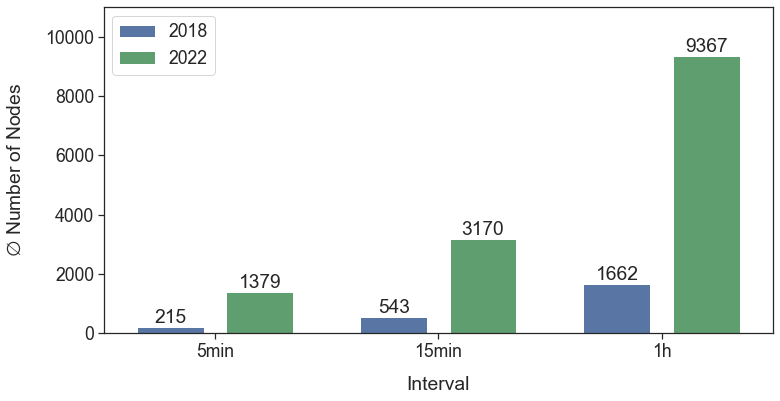

In [79]:
relevant_columns = ['mean_node_size', 'interval', 'year']
complete_df = pd.concat([five_min_stats_2018_df[relevant_columns], fifteen_min_stats_2018_df[relevant_columns],
                         hour_stats_2018_df[relevant_columns], five_min_stats_2022_df[relevant_columns],
                         fifteen_min_stats_2022_df[relevant_columns], hour_stats_2022_df[relevant_columns]],
                        ignore_index=True)
complete_df = complete_df.drop_duplicates('mean_node_size', keep='first')
# Draw a nested boxplot to show bills by day and time

plt.figure(figsize=(12, 6))

ax = sns.barplot(x="interval", y="mean_node_size",
                 hue="year", palette=["b", "g"],
                 data=complete_df)

ax.set_xlabel('Interval', labelpad=15)
ax.set_ylabel(r'$\varnothing$ Number of Nodes', labelpad=20)
change_vertical_bar_width(ax, .3)
ax.set(ylim=(0, 11000))
#ax.set_title(r'$\varnothing$ Anzahl Knoten in Netzwerk pro Intervall', pad=20)
ax.set_title('')
plt.legend(title="")
for container in ax.containers:
    ax.bar_label(container)

### Avg. Berechnugnszeit pro Intervall - 2018

Text(0.5, 1.0, '$\\varnothing$ Computation time of a network comparison per interval - 2018')

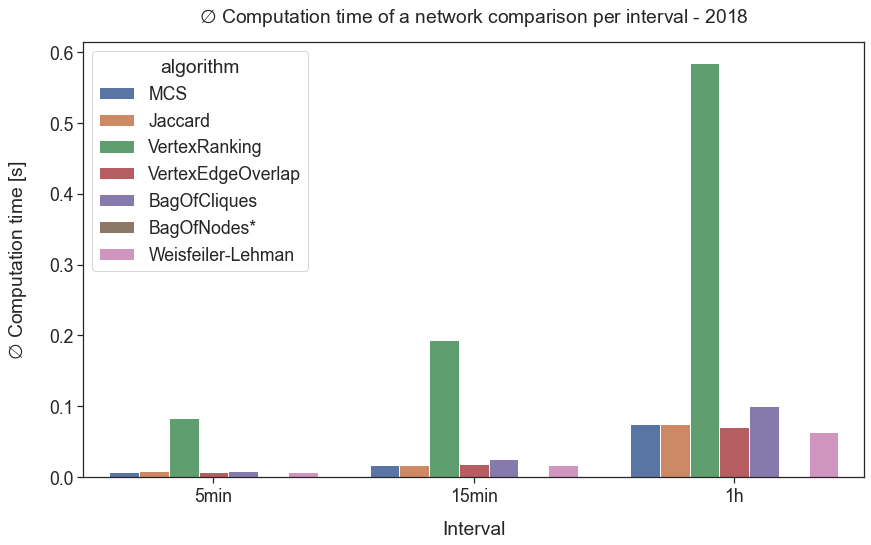

In [80]:
relevant_columns = ['algorithm', 'mean_duration_time', 'interval']
complete_df = pd.concat([five_min_stats_2018_df[relevant_columns], fifteen_min_stats_2018_df[relevant_columns],
                         hour_stats_2018_df[relevant_columns]], ignore_index=True)
complete_df = complete_df.drop_duplicates(['algorithm', 'interval'], keep='first')
complete_df['mean_duration_time'] = complete_df['mean_duration_time'].apply(
    lambda p: float(pd.to_timedelta(p).total_seconds()))

complete_df['algorithm'] = complete_df['algorithm'].apply(
    lambda x: 'Weisfeiler-Lehman' if x == "WeisfeleirLehmanKernel" else x)

complete_df['algorithm'] = complete_df['algorithm'].apply(
    lambda x: 'BagOfNodes*' if x == "BagOfNodes" else x)

# plot figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='interval', y='mean_duration_time', hue='algorithm', data=complete_df)

#labels
ax.set_xlabel('Interval', labelpad=15)
ax.set_ylabel(r'$\varnothing$ Computation time [s]', labelpad=20)
ax.set_title(r'$\varnothing$ Computation time of a network comparison per interval - 2018', pad=20)

### Avg. Berechnugnszeit pro Intervall - 2022

Text(0.5, 1.0, '$\\varnothing$ Computation time of a network comparison per interval - 2022')

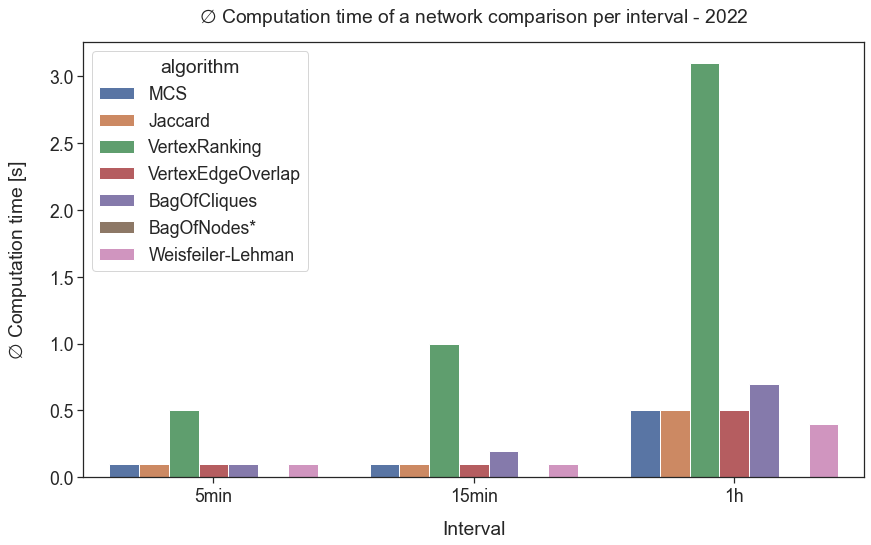

In [81]:
relevant_columns = ['algorithm', 'mean_duration_time', 'interval']
complete_df = pd.concat([five_min_stats_2022_df[relevant_columns], fifteen_min_stats_2022_df[relevant_columns],
                         hour_stats_2022_df[relevant_columns]], ignore_index=True)
complete_df = complete_df.drop_duplicates(['algorithm', 'interval'], keep='first')
complete_df['mean_duration_time'] = complete_df['mean_duration_time'].apply(
    lambda p: round(float(pd.to_timedelta(p).total_seconds()), 1))

complete_df['algorithm'] = complete_df['algorithm'].apply(
    lambda x: 'Weisfeiler-Lehman' if x == "WeisfeleirLehmanKernel" else x)

complete_df['algorithm'] = complete_df['algorithm'].apply(
    lambda x: 'BagOfNodes*' if x == "BagOfNodes" else x)

# plot figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='interval', y='mean_duration_time', hue='algorithm', data=complete_df)

# labels
ax.set_xlabel('Interval', labelpad=15)
ax.set_ylabel(r'$\varnothing$ Computation time [s]', labelpad=20)
ax.set_title(r'$\varnothing$ Computation time of a network comparison per interval - 2022', pad=20)

## 4 - Further Analysis

c:\users\mfehlmann\github\comp_twitter_na_prep\venv\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


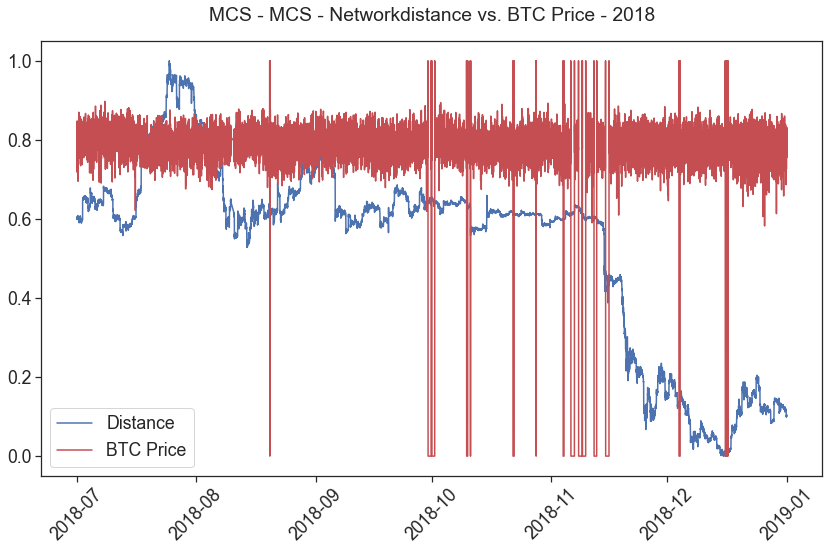

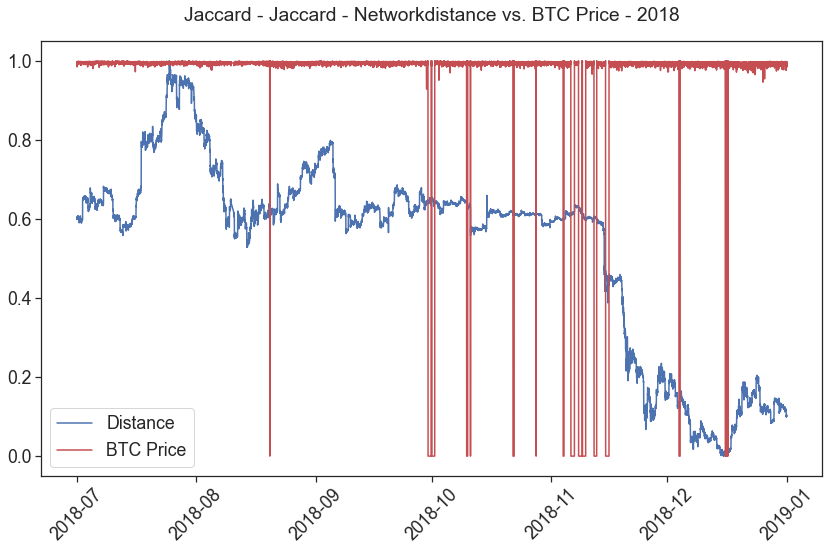

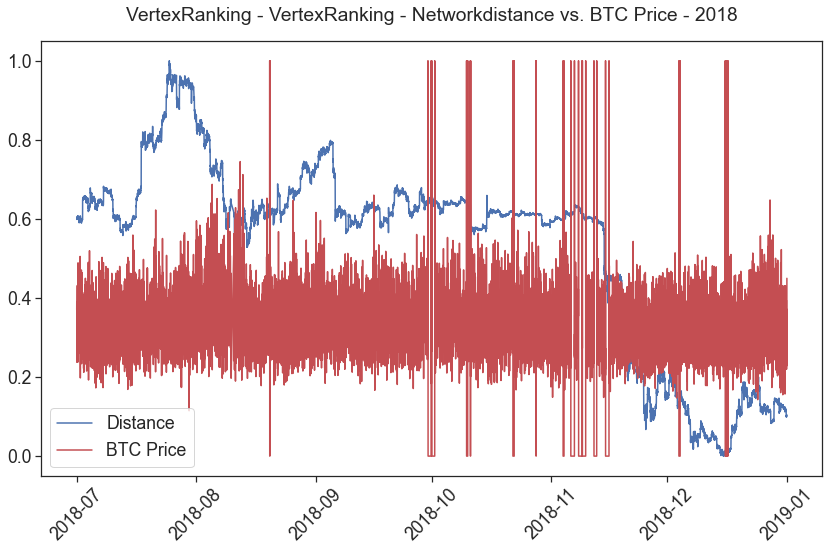

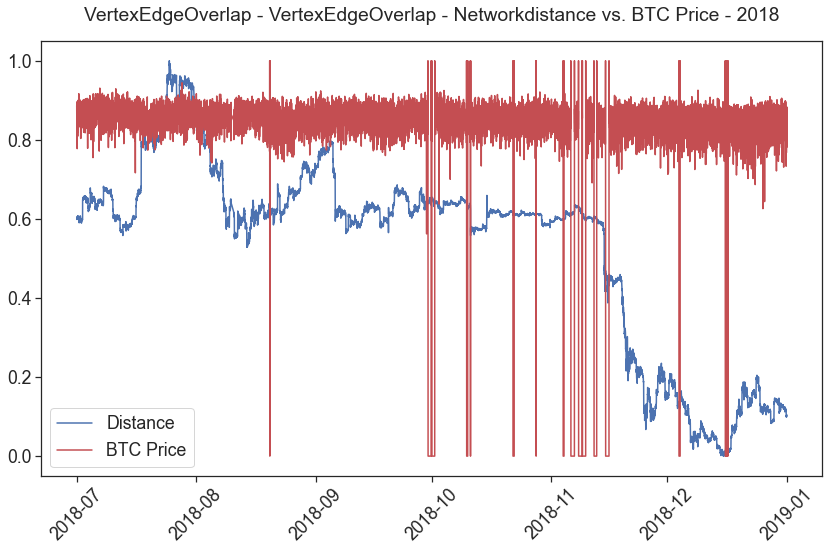

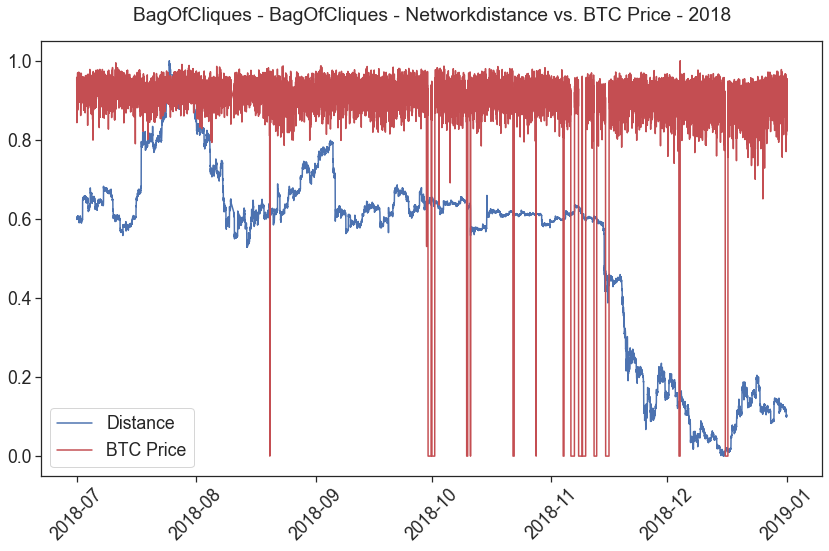

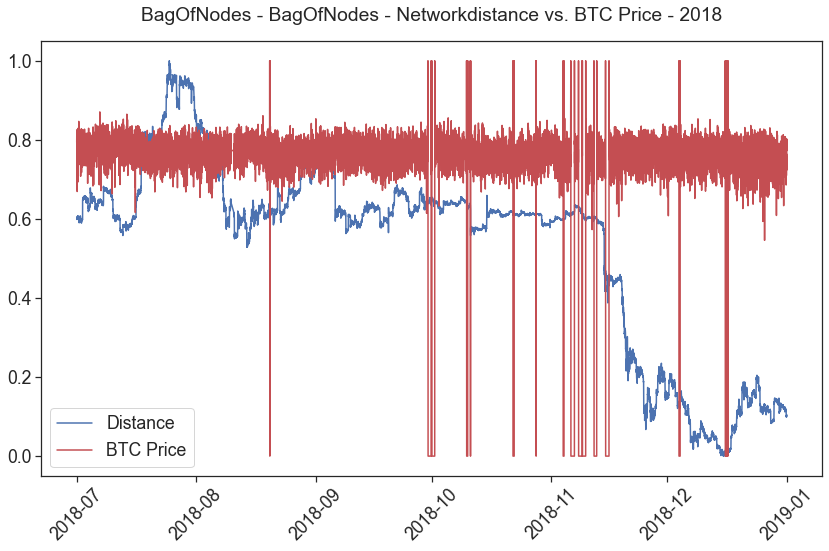

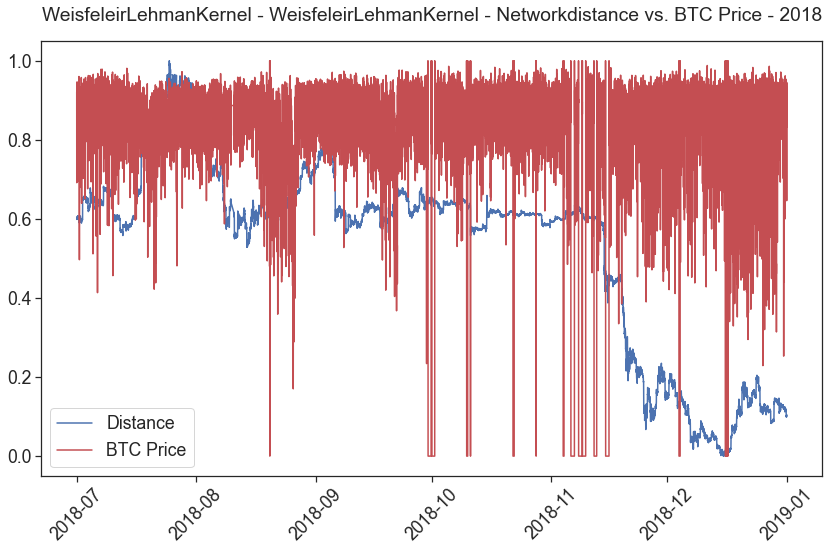

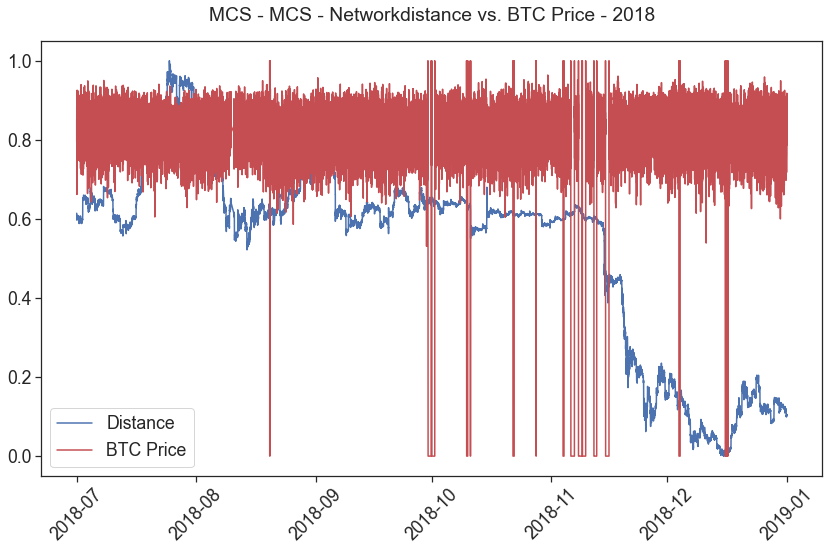

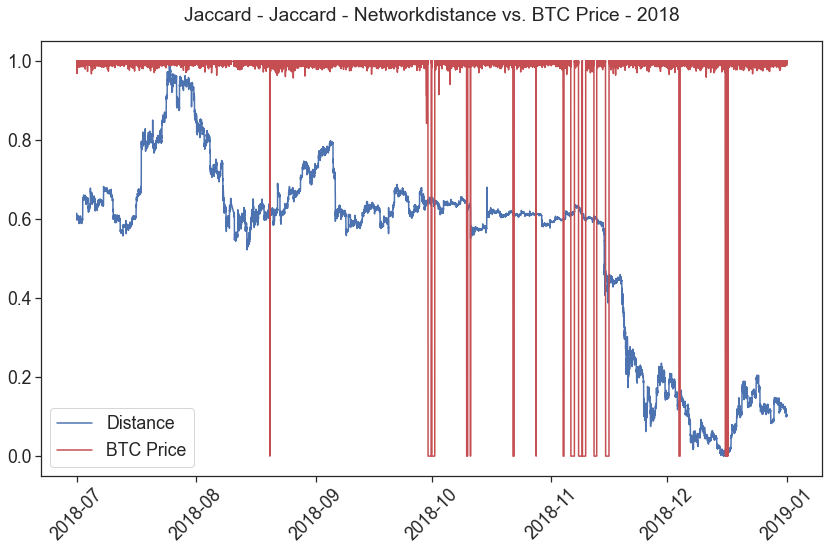

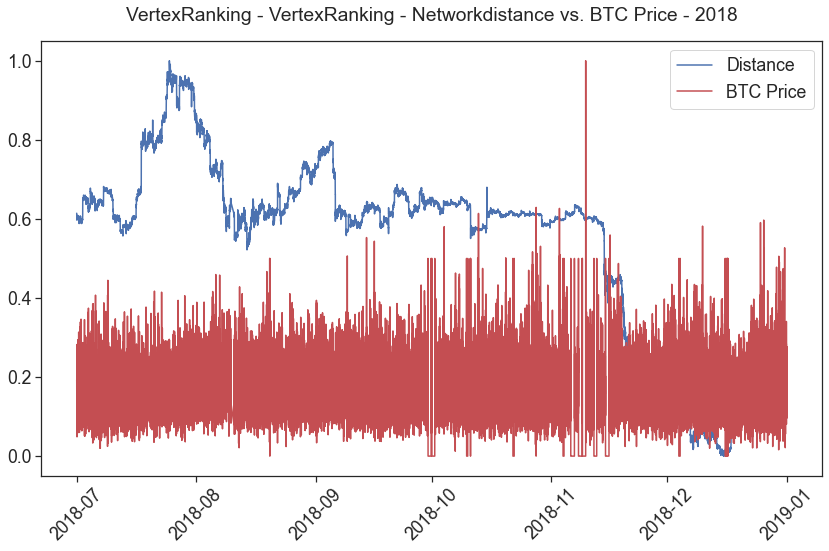

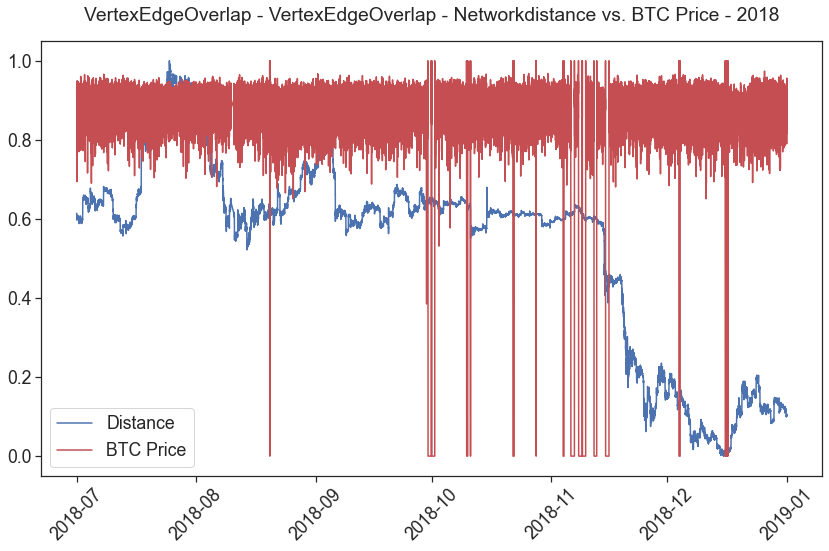

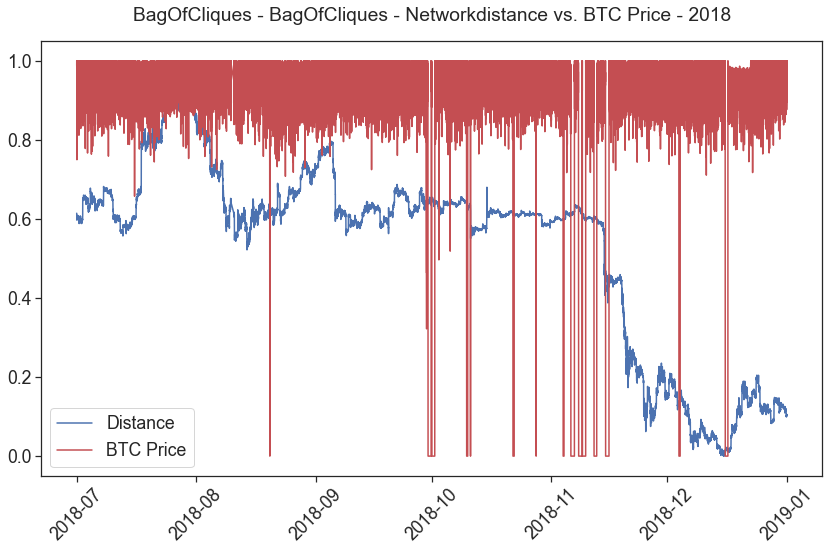

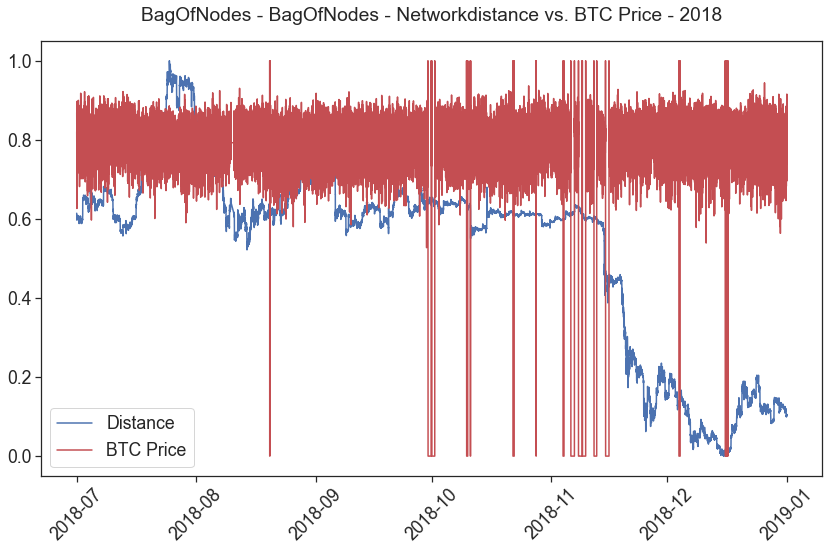

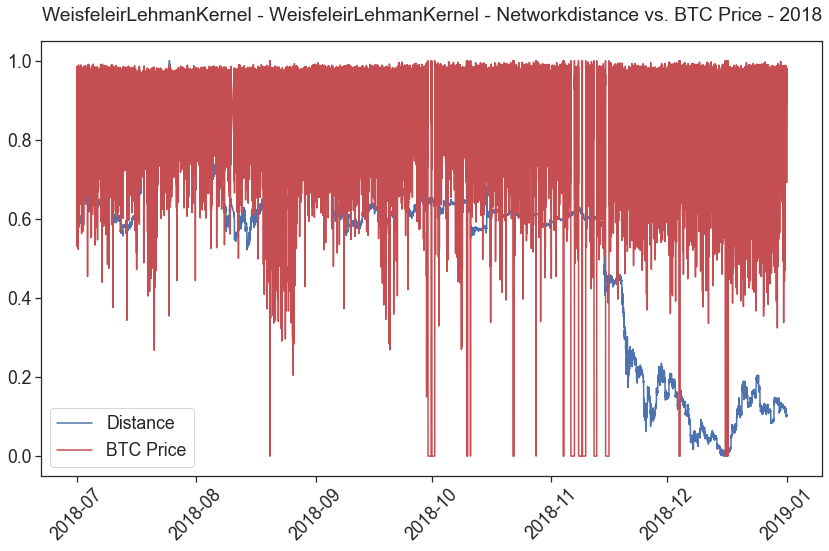

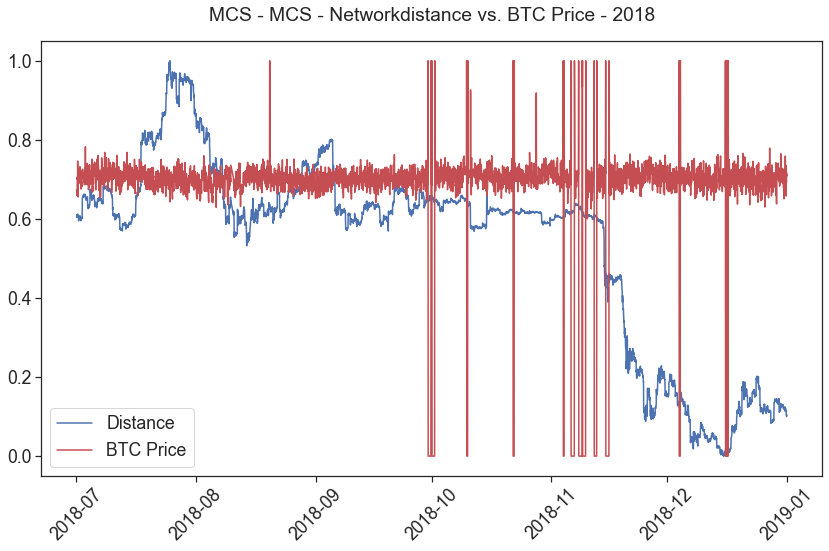

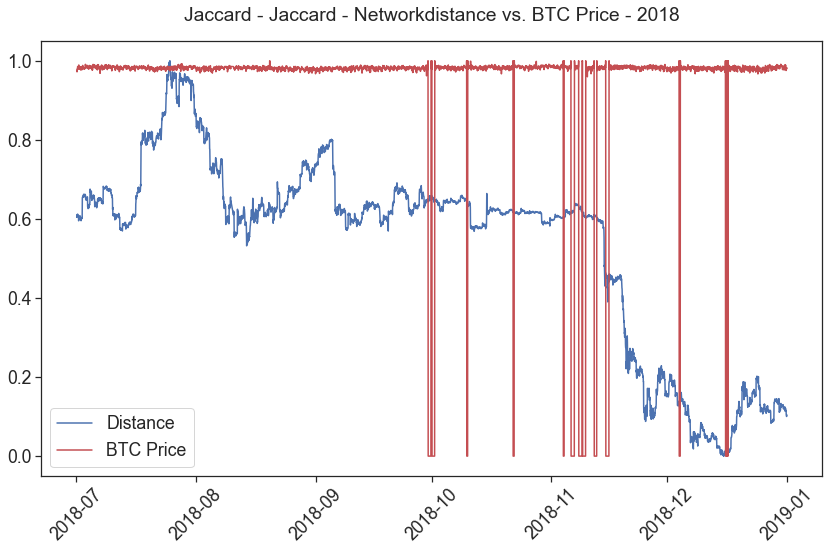

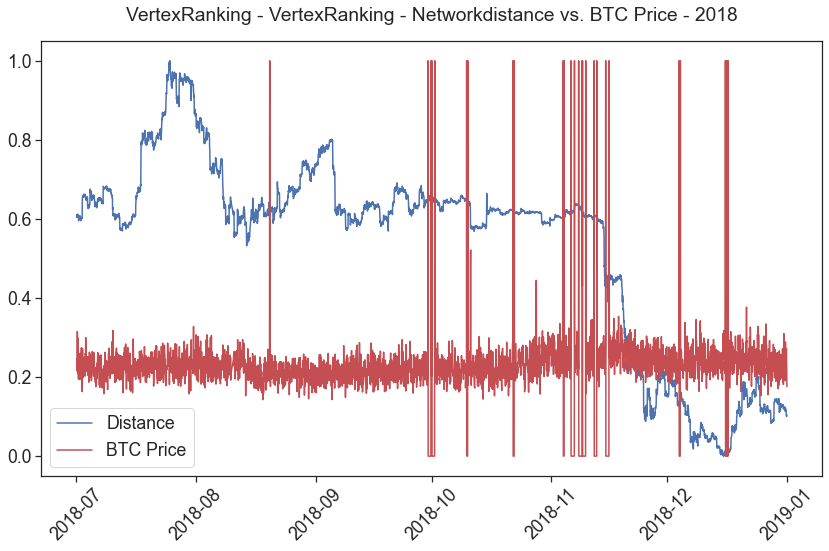

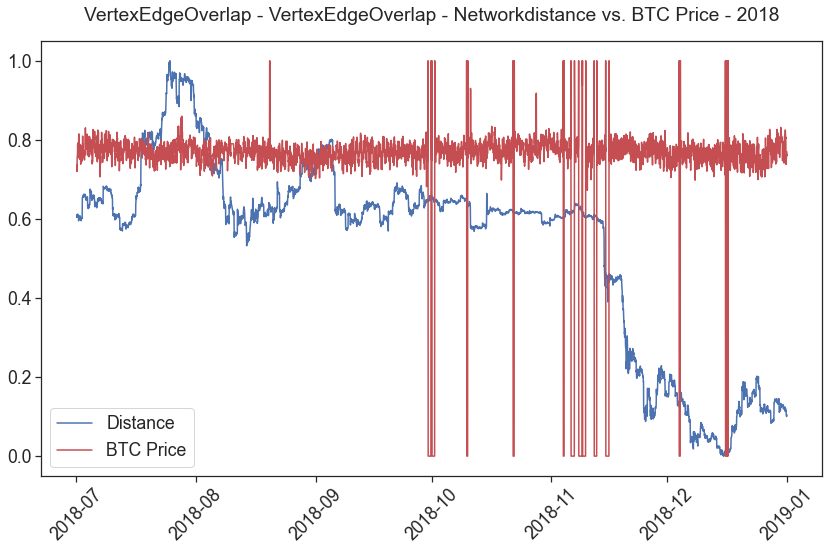

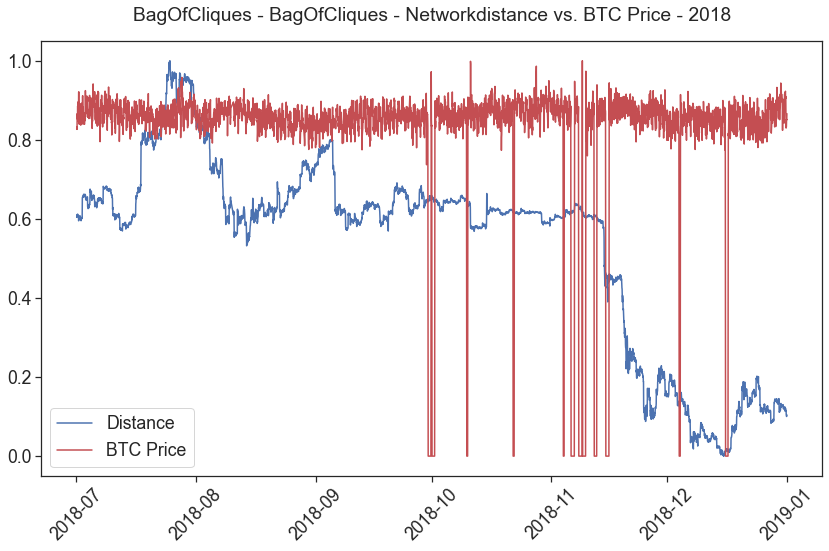

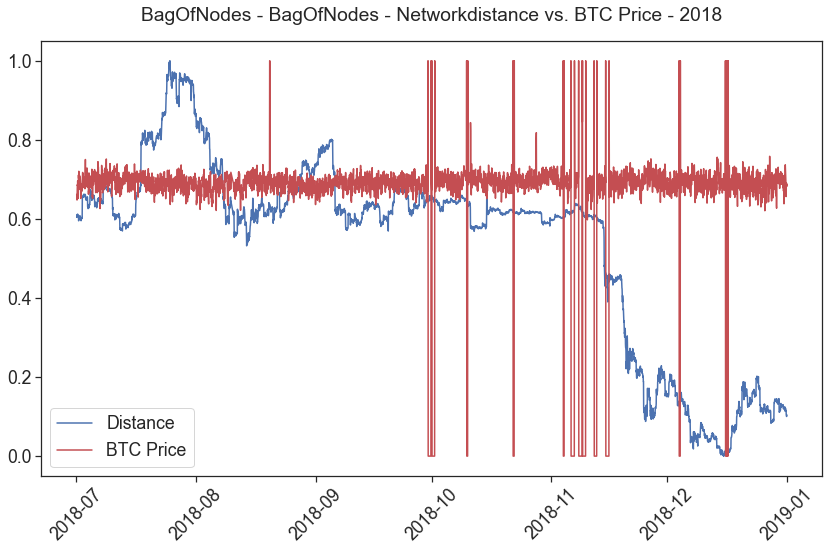

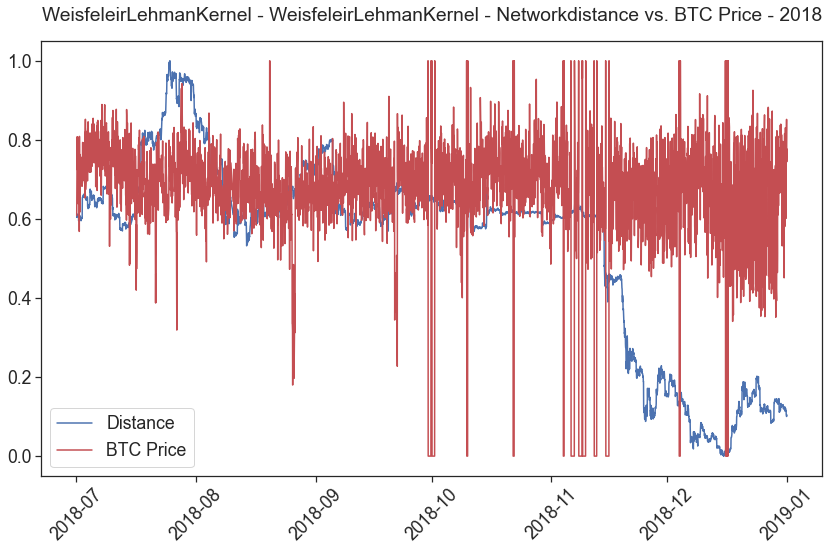

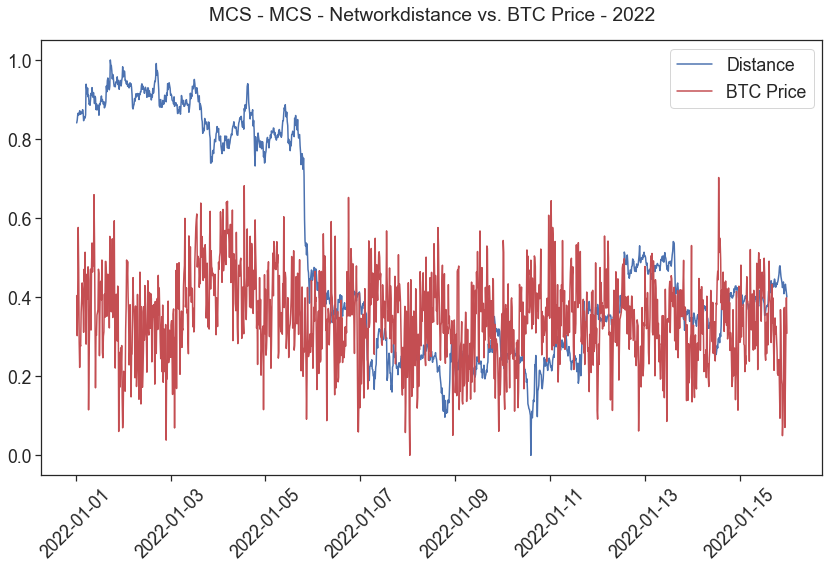

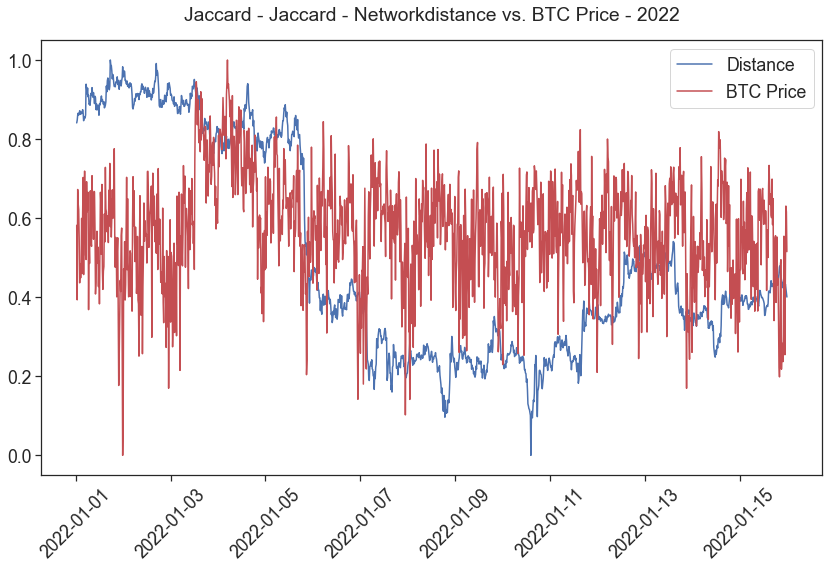

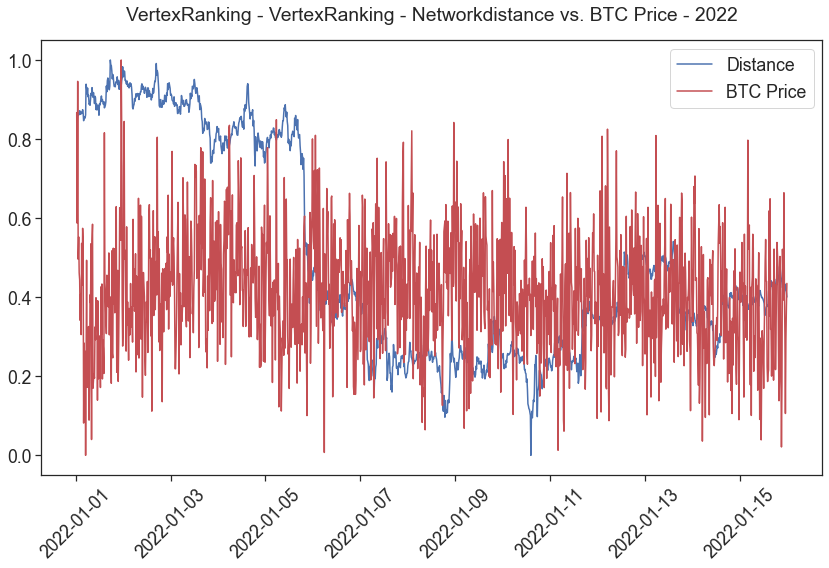

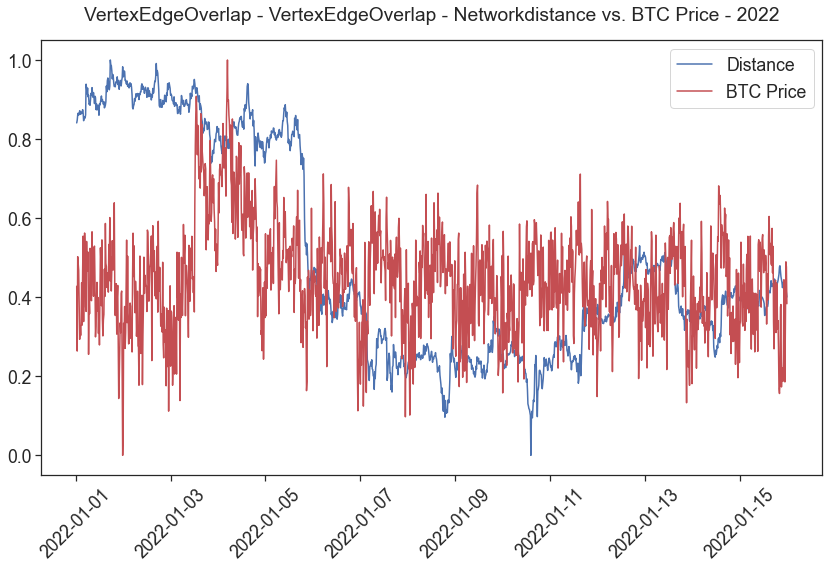

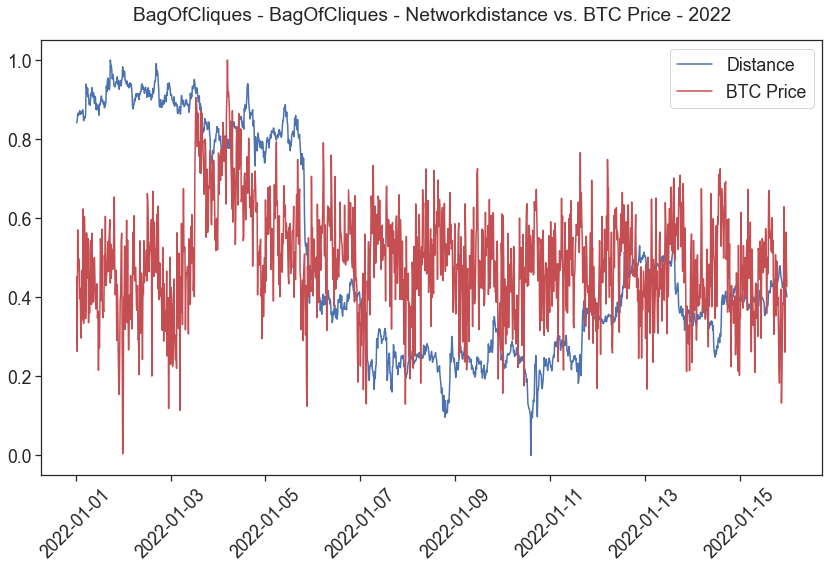

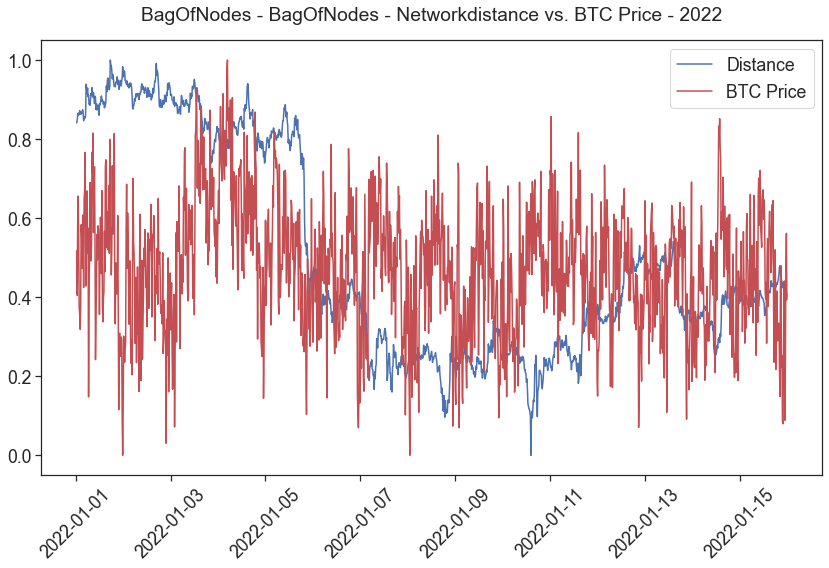

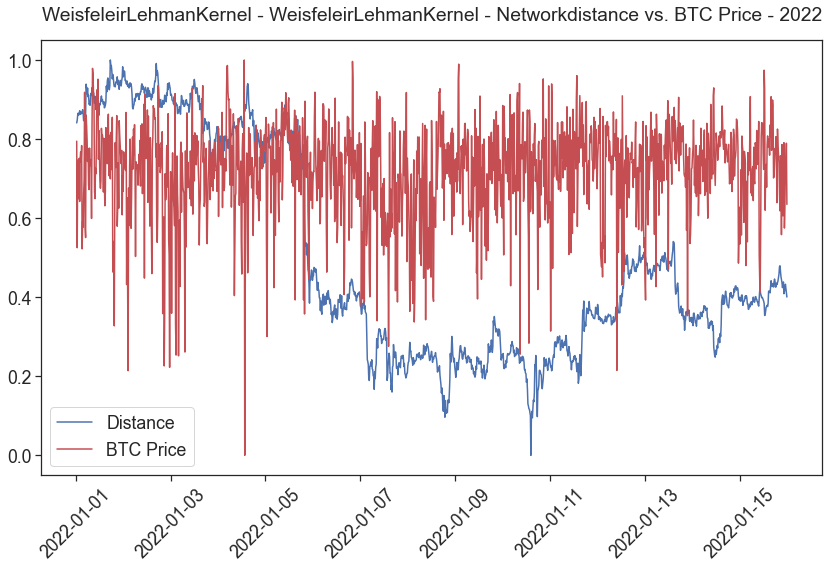

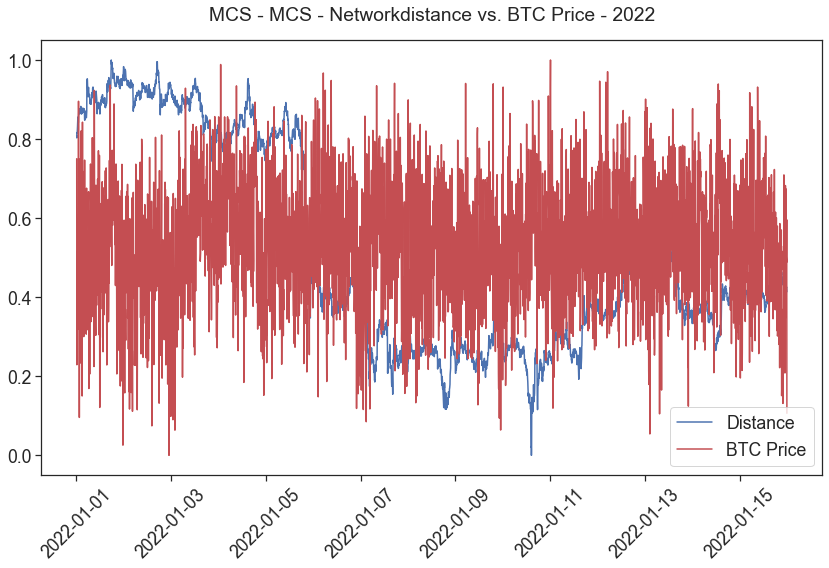

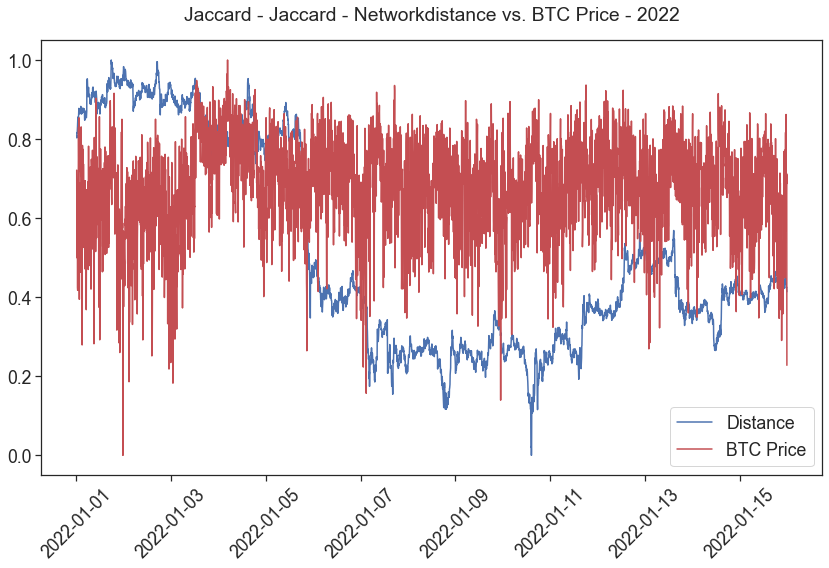

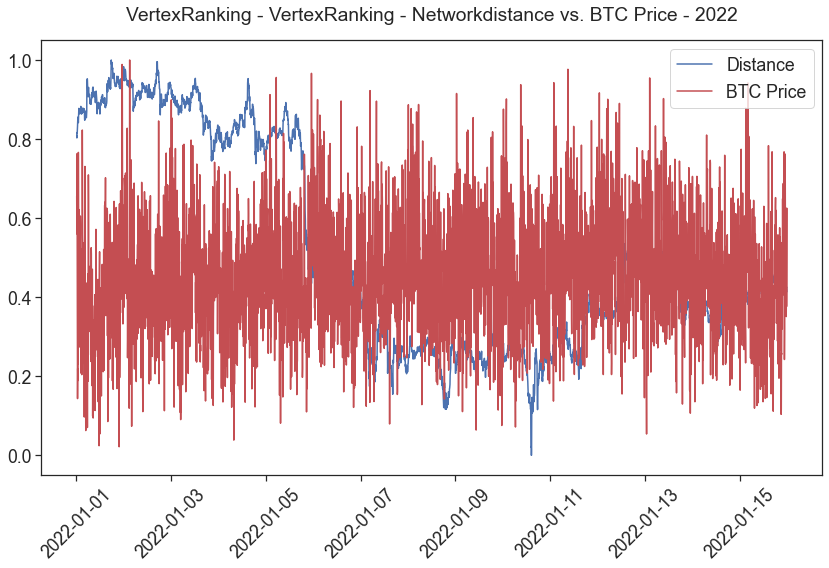

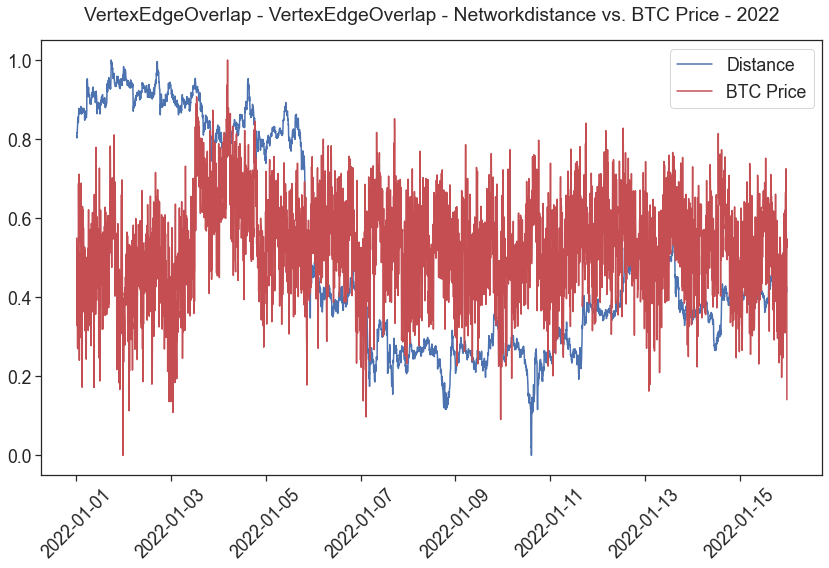

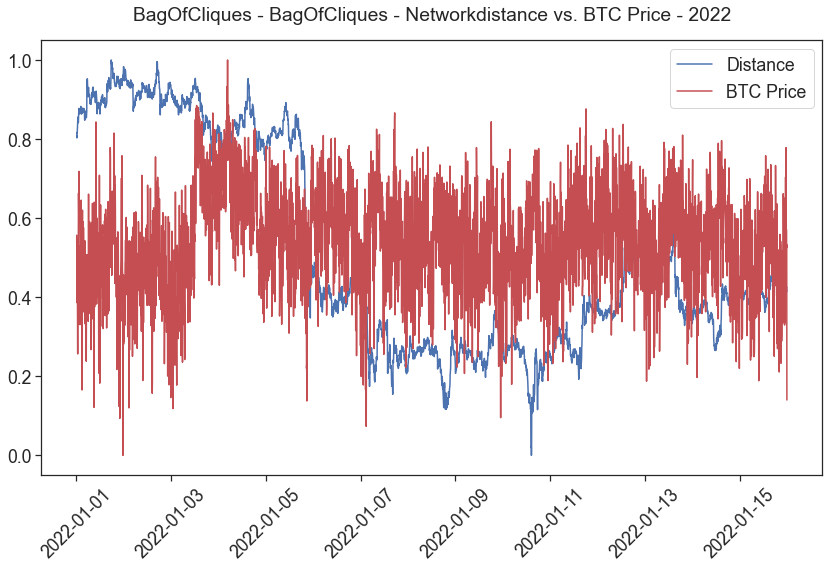

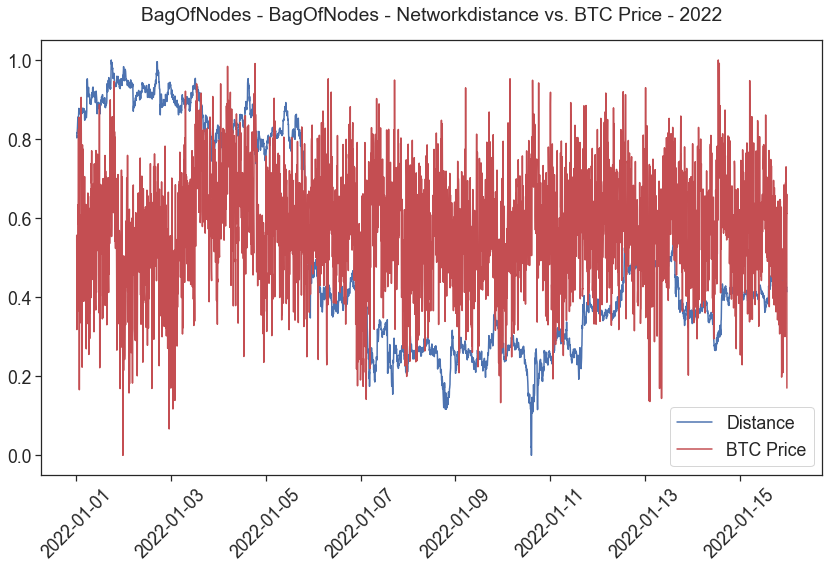

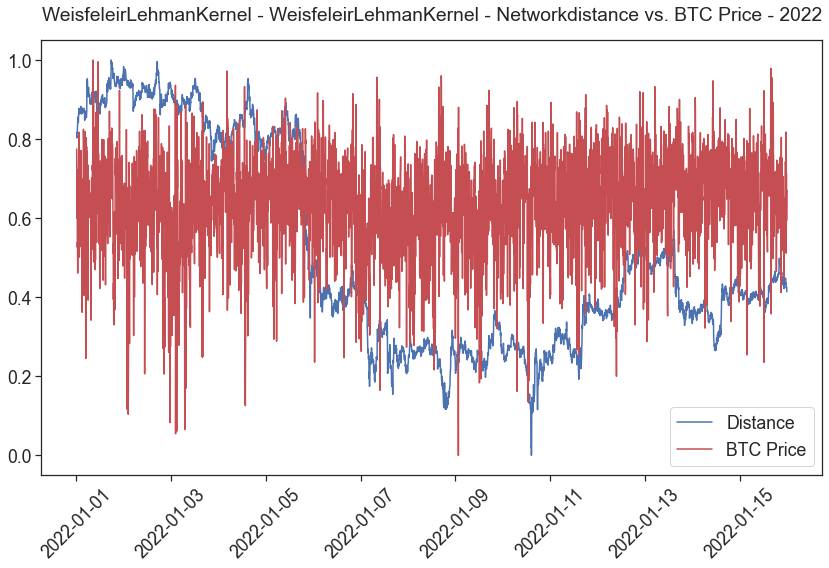

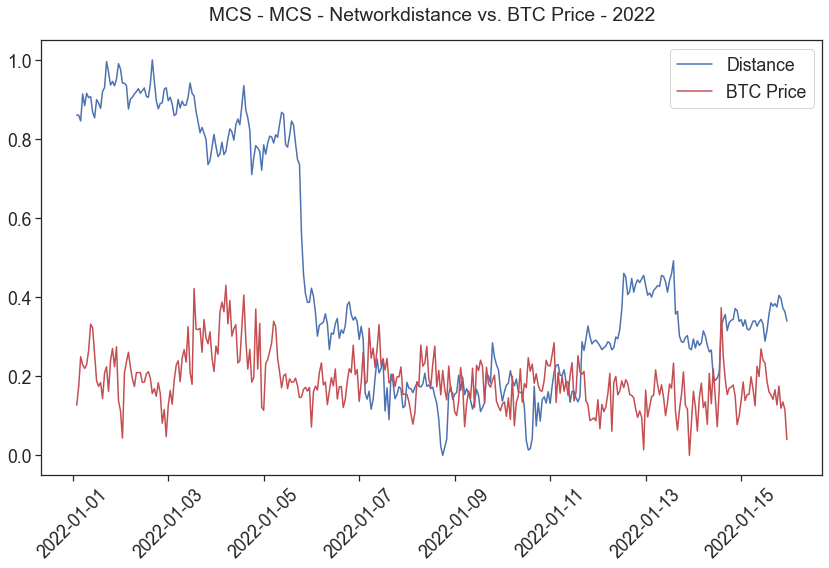

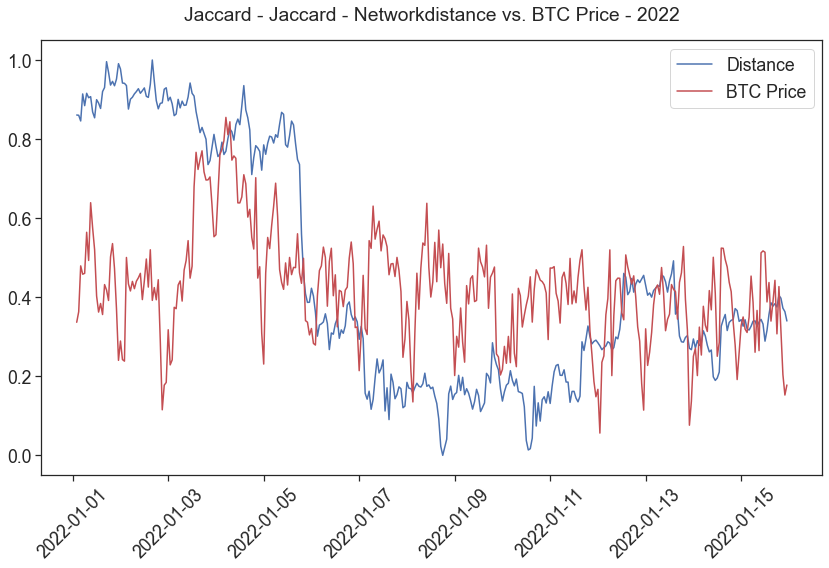

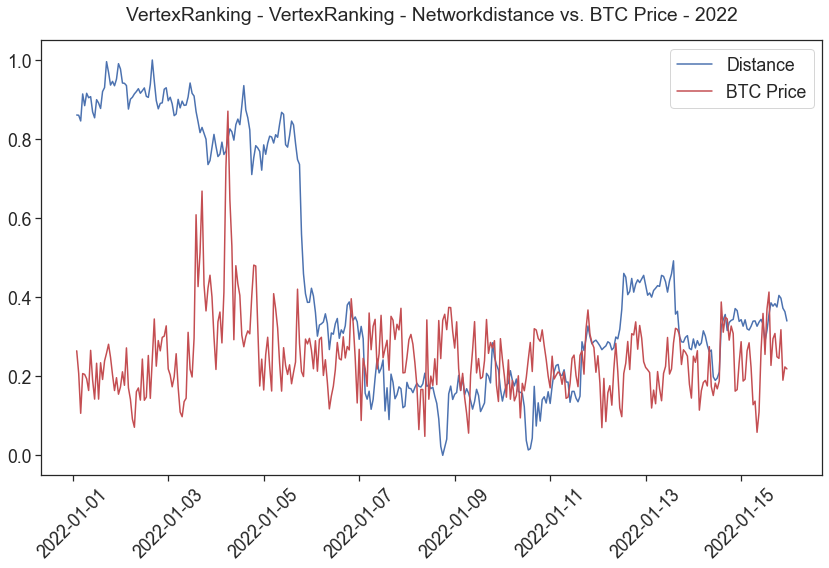

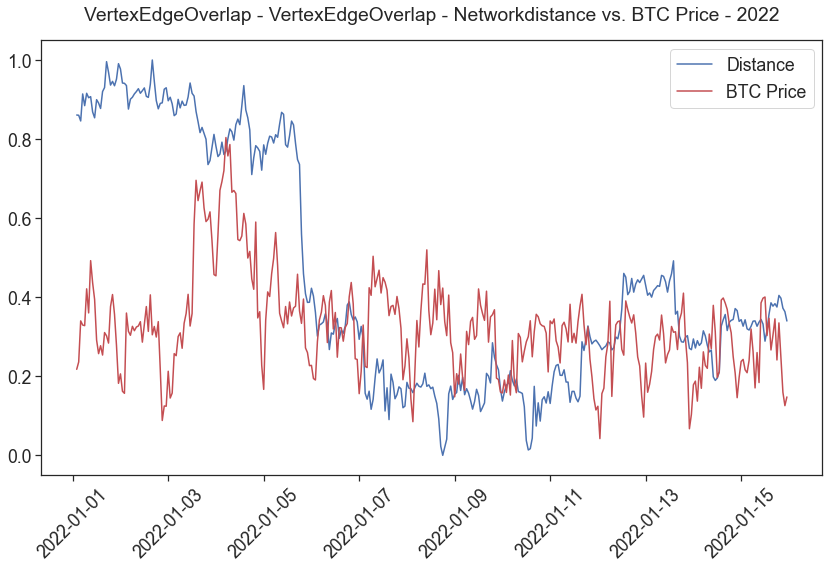

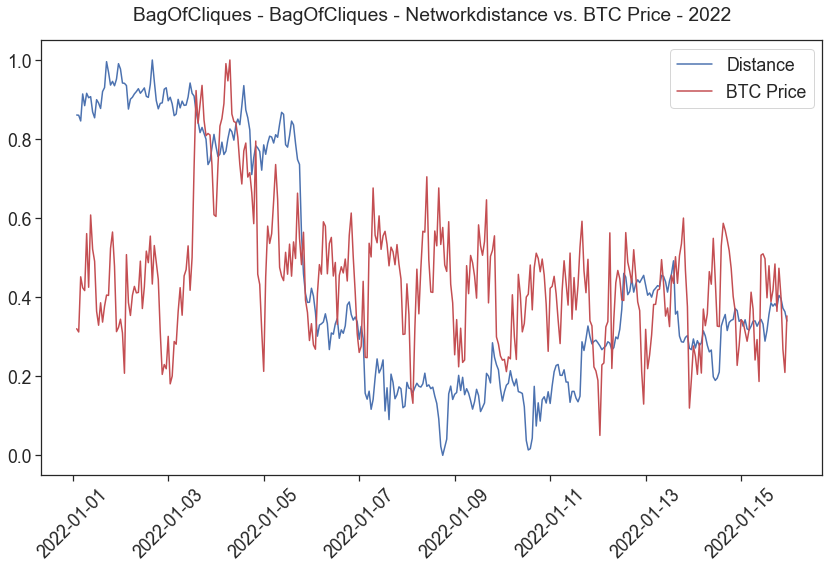

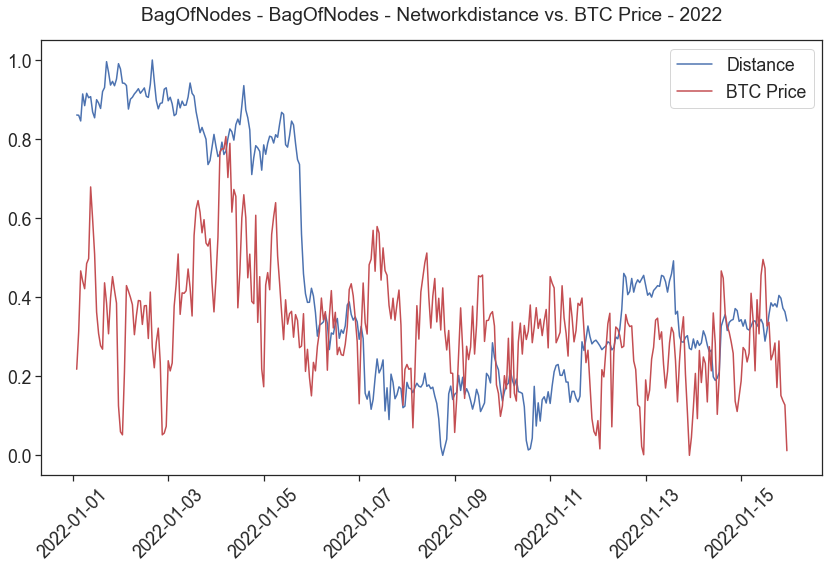

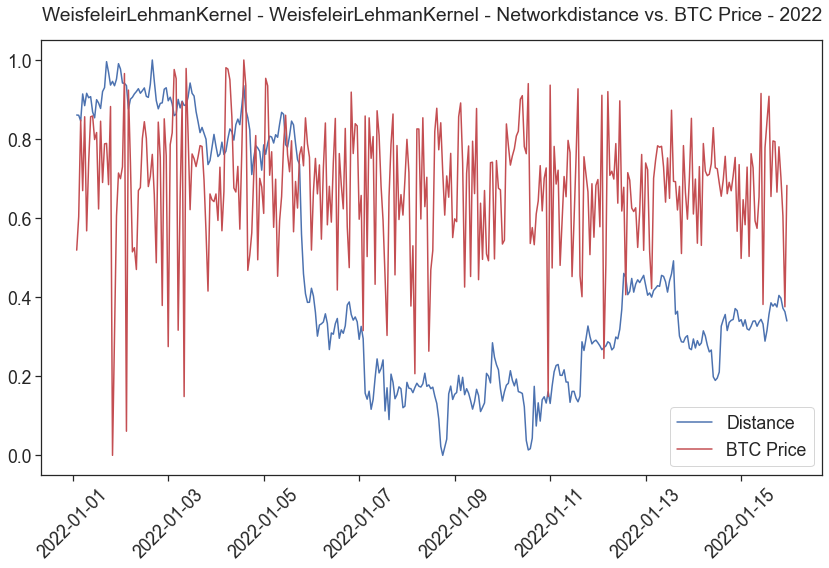

In [82]:
from sklearn.preprocessing import MinMaxScaler
import datetime

datetime.datetime.strptime

result_df_converter = {
    'date_time': pd.to_datetime
}

result_files_path = "../data/comp_results/"


def read_result_df(dir_root, file):
    return pd.read_csv(dir_root + "/" + file, header=0, converters=result_df_converter)


def parse_resolve_algorithm(raw_algorithm):
    if raw_algorithm == 'VertexRanking':
        return 'VR'
    elif raw_algorithm == 'VertexEdgeOverlap':
        return 'VEO'
    elif raw_algorithm == 'BagOfCliques':
        return 'BoC'
    elif raw_algorithm == 'BagOfNodes':
        return 'BoN'
    elif raw_algorithm == 'WeisfeleirLehmanKernel':
        return 'WL-Kernel'
    else:
        return algorithm


def plot_network_vs_btc_price_chart(data_df, partition, algorithm, year):
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(
        x="date_time",
        y="vals",
        hue="cols",
        data=data_df,
        palette=["b", "r"])

    # set labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    algorithm_resolved = parse_resolve_algorithm(algorithm)
    ax.set_title(f"{partition} - {algorithm_resolved} - Networkdistance vs. BTC Price - {year}", pad=20)
    plt.legend(title="", labels=['Distance', 'BTC Price'])
    plt.xticks(rotation=45)


for root, dirs, files in os.walk(result_files_path):
    for dir in dirs:
        for year_root, year_dirs, year_files in os.walk(result_files_path + dir):
            year = dir
            for file in year_files:

                # only read comp data
                if not 'comp' in file:
                    continue

                # read data
                comp_df = read_result_df(year_root, file)
                partition = file.split("_")[0]

                # normalize btc price
                min_max_scaler = MinMaxScaler()
                comp_df[['close']] = min_max_scaler.fit_transform(comp_df[['close']])

                for algorithm in comp_df.columns.tolist():
                    if algorithm == 'date_time' or algorithm == 'close':  # ignore the btc price column
                        continue

                    plot_df = comp_df[['date_time', 'close', algorithm]]
                    plot_df_melt = plot_df.melt('date_time', var_name='cols', value_name='vals')
                    plot_network_vs_btc_price_chart(plot_df_melt, algorithm, partition, year)